In [5]:
import bambi as bmb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import defaultdict
from IPython.display import display
from scipy import stats
import pymc as py
import arviz as az

In [3]:
# CSV-Datei laden
csv_file = 'step_analysis_results_l.csv'
df_l = pd.read_csv(csv_file, header=None)  # Falls die CSV keine Header hat

# Spaltennamen hinzufügen (falls keine vorhanden sind)
df_l.columns = ['Participant', 'Condition', 'Trial', 'NumStrides', 
              'MeanStepLength', 'Velocity', 
              'MeanFootAngle', 'MeanKneeAngle']
# CSV-Datei laden
csv_file_2 = 'step_analysis_results_l.csv'
df_r = pd.read_csv(csv_file_2, header=None)  # Falls die CSV keine Header hat

# Spaltennamen hinzufügen (falls keine vorhanden sind)
df_r.columns = ['Participant', 'Condition', 'Trial', 'NumStrides', 
              'MeanStepLength', 'Velocity', 
              'MeanFootAngle', 'MeanKneeAngle']


(array([ 50.,   0.,   0.,  23., 117.,  94.,  63.,  45.,  12.,   6.]),
 array([  0.        ,  91.58549269, 183.17098539, 274.75647808,
        366.34197077, 457.92746347, 549.51295616, 641.09844886,
        732.68394155, 824.26943424, 915.85492694]),
 <BarContainer object of 10 artists>)

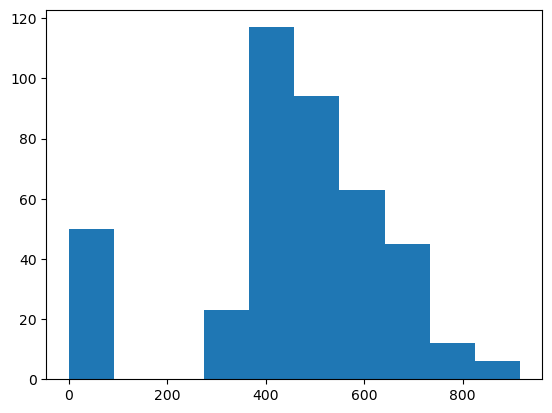

In [3]:
plt.hist(df_l.Velocity)

In [4]:
df_l.keys()

Index(['Participant', 'Condition', 'Trial', 'NumStrides', 'MeanStepLength',
       'Velocity', 'MeanFootAngle', 'MeanKneeAngle'],
      dtype='object')

In [5]:
print(df_l[df_l["Condition"] == 1].Velocity)

0       4.155823
1       4.690243
2       4.279485
3       5.100992
4       4.833427
41      5.002868
42      3.808231
43     14.775071
44      4.455017
45      4.233286
82      3.172959
83      3.304440
84      3.314411
85      3.685599
86     65.037599
123     4.126516
124     0.000000
125     4.270745
126     0.000000
127     5.036061
164     3.502476
165     3.514616
166     3.452357
167     4.303732
168     3.871147
205     4.820808
206    82.902188
207     0.000000
208     3.385953
209     5.076521
246    79.195234
247    74.661654
248    85.227877
249    68.558100
250    73.764450
287     0.000000
288     0.000000
289     0.000000
290    47.786835
291     0.000000
328     0.000000
329     0.000000
330     0.000000
331     0.000000
332     0.000000
369     3.538875
370     3.654273
371     4.309461
372     4.315618
373     3.849295
Name: Velocity, dtype: float64


In [4]:
model = bmb.Model("NumStrides ~  Condition", df_l) # (1 | x) is a random intercept
fitted = model.fit( 
    draws=1000, 
    tune= 1000,
    # init="adapt_diag", 
    # random_seed=69,
    cores=8,
    chains=8,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [sigma, Intercept, Condition]


Output()

Sampling 8 chains for 1_000 tune and 1_000 draw iterations (8_000 + 8_000 draws total) took 208 seconds.


array([<Axes: title={'center': 'sigma'}>,
       <Axes: title={'center': 'Intercept'}>,
       <Axes: title={'center': 'Condition'}>], dtype=object)

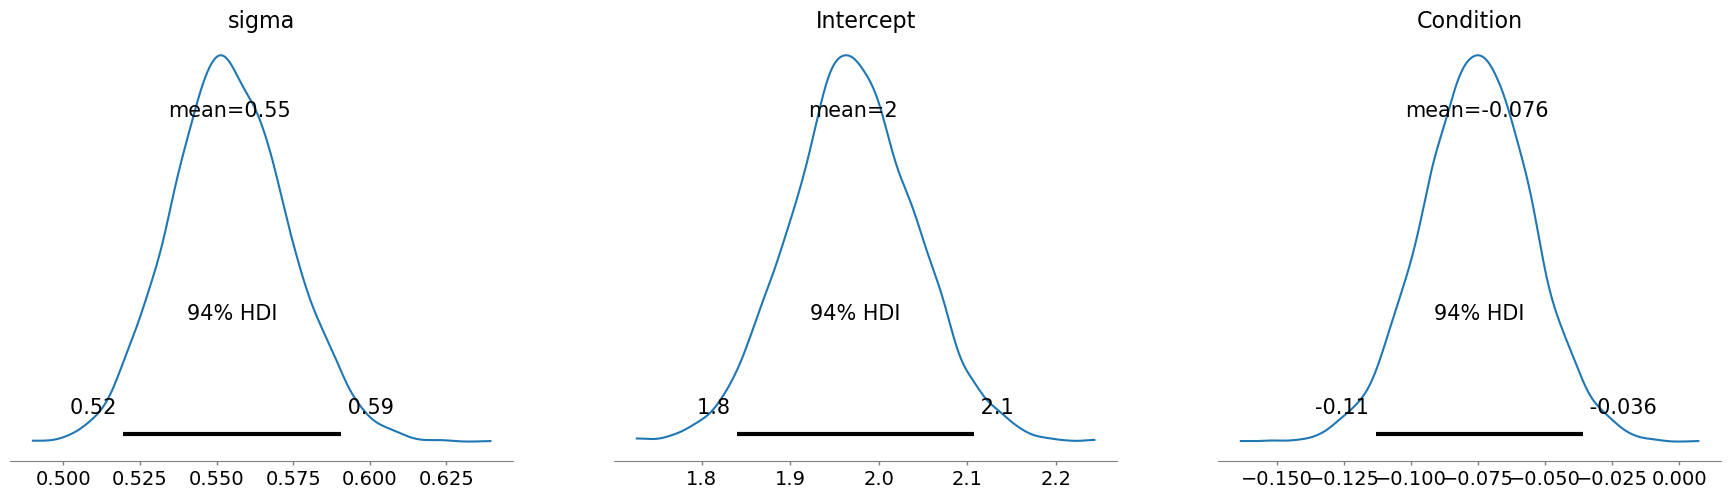

In [6]:
az.plot_posterior(fitted)

In [28]:
ppc = model.predict(idata=fitted, kind="pps", inplace=False)


c:\Users\LauflaborVR2\GS-MT_Test\.conda\Lib\site-packages\bambi\models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


In [29]:
print(ppc)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data


In [30]:

ppc_samples = ppc.posterior_predictive
print(ppc_samples)

<xarray.Dataset> Size: 26MB
Dimensions:     (chain: 8, draw: 1000, __obs__: 410)
Coordinates:
  * chain       (chain) int32 32B 0 1 2 3 4 5 6 7
  * draw        (draw) int32 4kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * __obs__     (__obs__) int32 2kB 0 1 2 3 4 5 6 ... 404 405 406 407 408 409
Data variables:
    NumStrides  (chain, draw, __obs__) float64 26MB 1.752 1.853 ... 2.311 1.641
Attributes:
    modeling_interface:          bambi
    modeling_interface_version:  0.14.0


<Axes: xlabel='NumStrides'>

c:\Users\LauflaborVR2\GS-MT_Test\.conda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\LauflaborVR2\GS-MT_Test\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


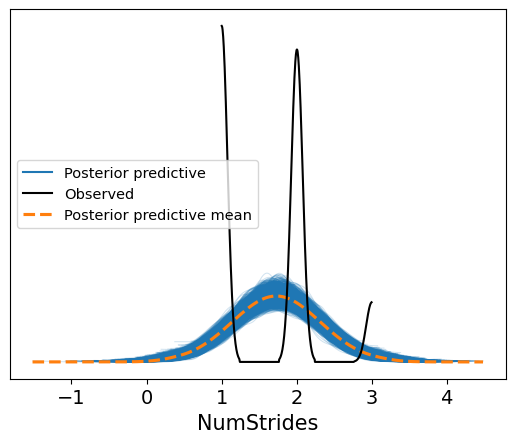

In [31]:
az.plot_ppc(ppc, var_names=["NumStrides"])